In this file we look closer at the IEDB Data.
The csv was created with the following filters (MHC_Class specific for each data file):
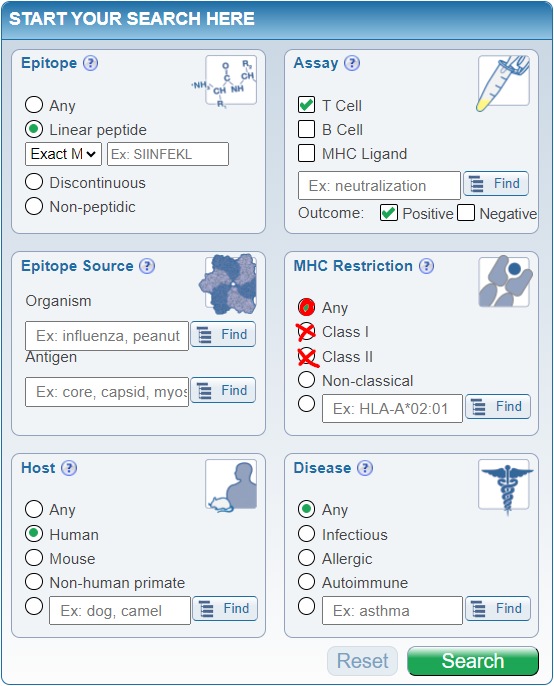

After loading this additional filter was used to distinct between paired, beta and any chains:

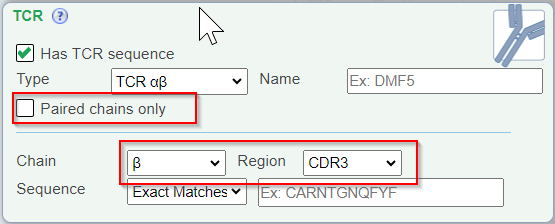

In [ ]:
import pandas as pd
import numpy as np

First we need a function which maps the column names to our schema:

In [34]:
def map_to_schema(df):
  ## Renaming:
  # epitope
  df.rename(columns={'Epitope - Name': 'Epitope'}, inplace=True)
  # MHC
  df.rename(columns={'Assay - MHC Allele Names': 'MHC A'}, inplace=True)
  df["MHC B"] = np.nan
  # alpha chain
  df.rename(columns={'Chain 1 - Curated V Gene': 'TRAV'}, inplace=True)
  df.rename(columns={'Chain 1 - Curated J Gene': 'TRAJ'}, inplace=True)
  df.rename(columns={'Chain 1 - CDR3 Curated': 'TRA_CDR3'}, inplace=True)
  # beta chain
  df.rename(columns={'Chain 2 - Curated V Gene': 'TRBV'}, inplace=True)
  df.rename(columns={'Chain 2 - Curated J Gene': 'TRBJ'}, inplace=True)
  df.rename(columns={'Chain 2 - CDR3 Curated': 'TRB_CDR3'}, inplace=True)
  # don't miss tcr_name
  #df.assign(TCR_name = lambda x: x)
  return df

The edit_epitope function catches entries like "LLFGFPVYV + SCM(F5)" and adapts them to be LLFGFPVYV only

In [35]:
def edit_epitope(epitope):
  if len(epitope.split('+')) > 1:
    # Split the string at the space character and take the first part, then strip quotation marks
    return epitope.split('+')[0].replace(" ", "")
  else:
    return epitope

Initially all values regarding MHC Allele are stored in MHC A. In this function they should be cleaned to the format ("MHC A"/"MHC B")

In [43]:
def mhc_b_annotation(mhc):
  # check if third letter after the hyphen is a "b". e.g. HLA-DRB*...
  print(mhc.split("-")[1])
  return mhc.split("-")[1][2] == 'B'

DRB
success


In [ ]:
def edit_mhc(mhc):
  # remove class names
  # bring to the right format A/B
  if(mhc.contains('class')):
    mhc = np.nan
  else:
    '''Values like:
    HLA-B8
    HLA-A2
    
    HLA-DQ1 // Should this be DQB maybe? bc it's from MHCII file
    HLA-DR2 // Should this be DRB2? bc it's from MHCII file
    HLA-DPB1*02:01
    HLA-DRB1*04:01 // this should be MHC B
    HLA-DRA*01:01/DRB1*15:01
    '''


  return mhc #wrong

# What happens with NaN values?

In [36]:
# need to have mapped dataframe in this function
def clean_data(df):
  ## Clean column epitope
  df['Epitope'] = df['Epitope'].apply(edit_epitope)
  # Filter the DataFrame to only include rows where the 'Epitope' values are in uppercase. exclude values like "beryllium atom"
  df = df[df['Epitope'].apply(lambda x: x.isupper())]

  ## Clean column MHC Allele
  # First remove all values which contains a comma
  df = df[~df['MHC A'].str.contains(',')]
  # Edit MHC values so the can split to MHC-A/MHC-B afterwards
  df['MHC A'] = df['MHC A'].apply(edit_mhc)
  # Split the "MHC A" column into two new columns: "MHC A" and "MHC B"
  df[['MHC A', 'MHC B']] = df['MHC A'].str.split('/', expand=True)

  return df

In [40]:
path_prefix_fitted = "../../data/IEDB/fitted_data"
path_prefix_plain = "../../data/IEDB/plain_data"

files = ["MHCI_IEDB_export.csv", "MHCI_IEDB_beta_export.csv", "MHCI_IEDB_paired_export.csv",
         "MHCII_IEDB_export.csv", "MHCII_IEDB_beta_export.csv", "MHCII_IEDB_paired_export.csv"]

#df_check = pd.read_csv(f"{path_prefix_plain}/MHCII_IEDB_export.csv")
#print(df_check["Assay - MHC Allele Names"].to_string())

'''
for file in files:
  df = pd.read_csv(f"{path_prefix_plain}/{file}")
  df = map_to_schema(df)
  df = clean_data(df)
  df.to_csv(f"{path_prefix_fitted}/{file}")
'''
#df = pd.read_csv(f"{path_prefix}/MHCI_IEDB_export.csv")
#print(df["Assay - Type"].to_string())

0                                          HLA-DRB1*04:01
1                                          HLA-DRB1*01:01
2                                          HLA-DRB1*01:01
3                                HLA-DRA*01:01/DRB1*15:01
4                                HLA-DRA*01:01/DRB1*15:01
5                                HLA-DRA*01:01/DRB1*15:01
6                                HLA-DRA*01:01/DRB1*15:01
7                                HLA-DRA*01:01/DRB1*15:01
8                                          HLA-DRB1*04:01
9                                          HLA-DRB1*04:01
10                               HLA-DRA*01:01/DRB1*04:01
11                                                HLA-DQ1
12                              HLA-DQA1*01:02/DQB1*05:02
13                              HLA-DQA1*01:02/DQB1*05:02
14                                         HLA-DRB3*03:01
15                                         HLA-DRB3*03:01
16                                         HLA-DRB3*03:01
17            

'\nfor file in files:\n  df = pd.read_csv(f"{path_prefix_plain}/{file}")\n  df = map_to_schema(df)\n  df = clean_data(df)\n  df.to_csv(f"{path_prefix_fitted}/{file}")\n'

now checkout the dataframe

In [38]:
print(df.head())
print(df.info())

              Epitope                      TRAV Chain 1 - Type TRAV TRAJ  \
0  GSLQPLALEGSLQKRGIV            HLA-DRB1*04:01          alpha  NaN  NaN   
1     GELIGTLNAAKVPAD            HLA-DRB1*01:01          alpha  NaN  NaN   
2     GELIGILNAAKVPAD            HLA-DRB1*01:01          alpha  NaN  NaN   
3     ENPVVHFFKNIVTPR  HLA-DRA*01:01/DRB1*15:01          alpha  NaN  NaN   
4     DFARVHFISALHGSG  HLA-DRA*01:01/DRB1*15:01          alpha  NaN  NaN   

                          Chain 1 - Protein Sequence TRA_CDR3  \
0  MQQVKQNSPSLSVQEGRISILNCDYTNSMFDYFLWYKKYPAEGPTF...      NaN   
1  IQVEQSPPDLILQEGANSTLRCNFSDSVNNLQWFHQNPWGQLINLF...      NaN   
2  IQVEQSPPDLILQEGANSTLRCNFSDSVNNLQWFHQNPWGQLINLF...      NaN   
3  MQQGEEDPQALSIQEGENATMNCSYKTSINNLQWYRQNSGRGLVHL...      NaN   
4  MQQGEEDPQALSIQEGENATMNCSYKTSINNLQWYRQNSGRGLVHL...      NaN   

  Chain 1 - CDR1 Curated Chain 1 - CDR2 Curated Chain 2 - Type TRBV TRBJ  \
0                    NaN                    NaN           beta  NaN  NaN   
